# Text generation using Recurrent Neural Networks and Natural Language Processing
## Using GRU to generate text for Romeo and Juliet.

Romeo and Juliet is a tragedy written by William Shakespeare early in his career about two young star-crossed lovers whose deaths ultimately reconcile their feuding families. 

Can the RNN backed NLP model authored by Shaan and Venkatesh write a novel for Shakespearean English? Check it out!

Authors: Shaan Kohli and Venkatesh Chandra

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Dataset

Edited few parts at the beginning (ex - acknowledgements and preface) to capture the pattern in text

In [7]:
from google.colab import files
uploaded = files.upload()

Saving romeo_juliet.txt to romeo_juliet.txt


In [0]:
input_text = uploaded['romeo_juliet.txt'].decode("utf-8")

In [9]:
input_text[:100]

'\ufeff                        THE PROLOGUE\r\n\r\n                        Enter Chorus.\r\n\r\n\r\n  Chor. Two hous'

Create a set of unique characters

In [10]:
letter_corpus = sorted(set(input_text))
letter_corpus[:10]

['\n', '\r', ' ', '!', '"', '$', '%', "'", '(', ')']

In [11]:
len(letter_corpus)

84

## Data pre-processing

Vectorize

In [0]:
char_to_ind = {u:i for i, u in enumerate(letter_corpus)}

In [0]:
ind_to_char = np.array(letter_corpus)

In [14]:
ind_to_char

array(['\n', '\r', ' ', '!', '"', '$', '%', "'", '(', ')', '*', ',', '-',
       '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':',
       ';', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
       'X', 'Y', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
       'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
       'v', 'w', 'x', 'y', 'z', '\ufeff'], dtype='<U1')

In [0]:
encoded_text = np.array([char_to_ind[c] for c in input_text])

In [16]:
encoded_text

array([83,  2,  2, ..., 13,  1,  0])

Let's check a sample

In [17]:
input_text[:100]

'\ufeff                        THE PROLOGUE\r\n\r\n                        Enter Chorus.\r\n\r\n\r\n  Chor. Two hous'

In [18]:
encoded_text[:100]

array([83,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2, 48, 36, 33,  2, 44, 46, 43, 40, 43,
       35, 49, 33,  1,  0,  1,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 33, 70, 76,
       61, 74,  2, 31, 64, 71, 74, 77, 75, 13,  1,  0,  1,  0,  1,  0,  2,
        2, 31, 64, 71, 74, 13,  2, 48, 79, 71,  2, 64, 71, 77, 75])

## Creating sequence



Let's grab few sentences to pick the right sequence length

In [19]:
print(input_text[:1500])

﻿                        THE PROLOGUE

                        Enter Chorus.


  Chor. Two households, both alike in dignity,
    In fair Verona, where we lay our scene,
    From ancient grudge break to new mutiny,
    Where civil blood makes civil hands unclean.
    From forth the fatal loins of these two foes
    A pair of star-cross'd lovers take their life;
    Whose misadventur'd piteous overthrows
    Doth with their death bury their parents' strife.
    The fearful passage of their death-mark'd love,
    And the continuance of their parents' rage,
    Which, but their children's end, naught could remove,
    Is now the two hours' traffic of our stage;
    The which if you with patient ears attend,
    What here shall miss, our toil shall strive to mend.
                                                         [Exit.]




ACT I. Scene I.
Verona. A public place.

Enter Sampson and Gregory (with swords and bucklers) of the house
of Capulet.


  Samp. Gregory, on my word, we'll not 

In [0]:
sentence = "Chor. Two households, both alike in dignity"

In [21]:
len(sentence)

43

In [0]:
part_stanza = """Chor. Two households, both alike in dignity,
    In fair Verona, where we lay our scene,
    From ancient grudge break to new mutiny,
    Where civil blood makes civil hands unclean"""

In [23]:
len(part_stanza)

181

### Training Sequences

In [0]:
seq_len = 180

In [0]:
total_num_seq = len(input_text)//(seq_len+1)

In [26]:
total_num_seq

972

In [0]:
char_dataset = tf.data.Dataset.from_tensor_slices(encoded_text)


drop_remainder specifies if the last batch should be droppped


In [0]:
sequences = char_dataset.batch(seq_len+1, drop_remainder=True)

Create target sequence

In [0]:
def create_seq_targets(seq):
    input_txt = seq[:-1]
    target_txt = seq[1:]
    return input_txt, target_txt

Map the target sequence

In [0]:
dataset = sequences.map(create_seq_targets)

Visualize the result

In [31]:
for input_txt, target_txt in  dataset.take(1):
    print(input_txt.numpy())
    print(''.join(ind_to_char[input_txt.numpy()]))
    print('\n')
    print(target_txt.numpy())
    print(''.join(ind_to_char[target_txt.numpy()]))

[83  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2 48 36 33  2 44 46 43 40 43 35 49 33  1  0  1  0  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 33 70 76 61 74  2 31
 64 71 74 77 75 13  1  0  1  0  1  0  2  2 31 64 71 74 13  2 48 79 71  2
 64 71 77 75 61 64 71 68 60 75 11  2 58 71 76 64  2 57 68 65 67 61  2 65
 70  2 60 65 63 70 65 76 81 11  1  0  2  2  2  2 37 70  2 62 57 65 74  2
 50 61 74 71 70 57 11  2 79 64 61 74 61  2 79 61  2 68 57 81  2 71 77 74
  2 75 59 61 70 61 11  1  0  2  2  2]
﻿                        THE PROLOGUE

                        Enter Chorus.


  Chor. Two households, both alike in dignity,
    In fair Verona, where we lay our scene,
   


[ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
 48 36 33  2 44 46 43 40 43 35 49 33  1  0  1  0  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 33 70 76 61 74  2 31 64
 71 74 77 75 13  1  0  1  0  1  0  2  2 31 64 71 74 13  

# Create batches

Shuffle to avoid any overfitting.
Large batch size increases the training time, hence we just use a batch_size of 1

In [0]:
batch_size = 1

buffer_size = 10000

dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)

In [33]:
dataset

<BatchDataset shapes: ((1, 180), (1, 180)), types: (tf.int64, tf.int64)>

## Create neural network

In [0]:
vocab_size = len(letter_corpus)

embed_dim = 64

rnn_neurons = 1026

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout,GRU
from tensorflow.keras.losses import sparse_categorical_crossentropy

### Building the model

logits=True means that one hot encoding is done

In [0]:
def sparse_cat_loss(y_true,y_pred):
  return sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)

In [0]:
def create_model(vocab_size, embed_dim, rnn_neurons, batch_size):
    model = Sequential()
    model.add(Embedding(vocab_size, embed_dim,batch_input_shape=[batch_size, None]))
    model.add(GRU(rnn_neurons,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'))
    # Final Dense Layer to Predict
    model.add(Dense(vocab_size))
    model.compile(optimizer='adam', loss=sparse_cat_loss, metrics=['accuracy']) 
    return model

In [0]:
model = create_model(
  vocab_size = vocab_size,
  embed_dim=embed_dim,
  rnn_neurons=rnn_neurons,
  batch_size=batch_size)

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (1, None, 64)             5376      
_________________________________________________________________
gru_3 (GRU)                  (1, None, 1026)           3361176   
_________________________________________________________________
dense_3 (Dense)              (1, None, 84)             86268     
Total params: 3,452,820
Trainable params: 3,452,820
Non-trainable params: 0
_________________________________________________________________


## It's time to train


I hated every minute of training, but I said, 'Don't quit. Suffer now and live the rest of your life as a champion' - Muhammad Ali


Training the model

In [0]:
epochs = 30

In [69]:
model.fit(dataset,epochs=epochs)

Epoch 1/30
972/972 [==============================] - 46s 48ms/step - loss: 1.4937 - accuracy: 0.5572
Epoch 2/30
972/972 [==============================] - 46s 48ms/step - loss: 1.3513 - accuracy: 0.5938
Epoch 3/30
972/972 [==============================] - 46s 48ms/step - loss: 1.2214 - accuracy: 0.6286
Epoch 4/30
972/972 [==============================] - 46s 48ms/step - loss: 1.0916 - accuracy: 0.6637
Epoch 5/30
972/972 [==============================] - 46s 48ms/step - loss: 0.9550 - accuracy: 0.7069
Epoch 6/30
972/972 [==============================] - 46s 48ms/step - loss: 0.8281 - accuracy: 0.7474
Epoch 7/30
972/972 [==============================] - 46s 47ms/step - loss: 0.7176 - accuracy: 0.7828
Epoch 8/30
972/972 [==============================] - 46s 47ms/step - loss: 0.6325 - accuracy: 0.8124
Epoch 9/30
972/972 [==============================] - 46s 47ms/step - loss: 0.5753 - accuracy: 0.8318
Epoch 10/30
972/972 [==============================] - 46s 47ms/step - loss: 0.655

In [70]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy
0,1.493690,0.557242
1,1.351261,0.593799
2,1.221382,0.628584
3,1.091634,0.663723
4,0.954984,0.706939


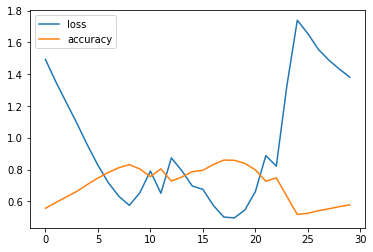

In [71]:
losses[['loss','accuracy']].plot()

Beautiful graph

Text(0, 0.5, 'metric')

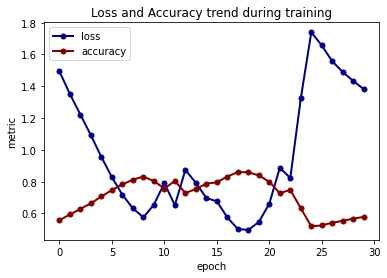

In [87]:
ax = losses.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Loss and Accuracy trend during training')
ax.set_xlabel("epoch")
ax.set_ylabel("metric")

## Step 6: Generating text

In [0]:
model.save('romeo_epoch20.h5') 

In [0]:
from tensorflow.keras.models import load_model

In [42]:
from google.colab import files
uploaded = files.upload()

Saving romeo_epoch30.h5 to romeo_epoch30.h5


In [0]:
model = create_model(vocab_size, embed_dim, rnn_neurons, batch_size=1)

model.load_weights('romeo_epoch30.h5')

model.build(tf.TensorShape([1, None]))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 64)             5376      
_________________________________________________________________
gru_1 (GRU)                  (1, None, 1026)           3361176   
_________________________________________________________________
dense_1 (Dense)              (1, None, 84)             86268     
Total params: 3,452,820
Trainable params: 3,452,820
Non-trainable params: 0
_________________________________________________________________


In [48]:
model['loss']

TypeError: ignored

In [0]:
def generate_text(model, start_seed,gen_size=100,temp=1.0):

  # Number of characters to generate
  num_generate = gen_size

  # Vecotrizing starting seed text
  input_eval = [char_to_ind[s] for s in start_seed]

  # Expand to match batch format shape
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty list to hold resulting generated text
  text_generated = []
 
  temperature = temp

  model.reset_states()

  for i in range(num_generate):

      # Generate Predictions
      predictions = model(input_eval)

      # Remove the batch shape dimension
      predictions = tf.squeeze(predictions, 0)

      # Use a cateogircal disitribution to select the next character
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # Pass the predicted charracter for the next input
      input_eval = tf.expand_dims([predicted_id], 0)

      # Transform back to character letter
      text_generated.append(ind_to_char[predicted_id])

  return (start_seed + ''.join(text_generated))

In [0]:
print(generate_text(model,"But",gen_size=1000))

But,
    Who say wethith is the day purg'd which your bight!
    Are providunity nurse, that mark much soul-

D.ASCup on phforight or verfain, is doth compirications comes and curnais,
    How?
    Allotions back,
    Where I sear and kindroud.
    A plaguage of gracksten, creptain!
    Show her plamangled us, now, sir?

  Wife. Spaker, you, sir.

  Cap. What                                                 [and] Buy Halth will'dinging, non, and pular our soul
    And lovely dreamerly eress murkdeds
    Whose she beshes eyes will be in thy brace!

                                                Enter Appraide his banished.

  Ben. I can you like whose's keaus.

  Speak. 'Tis answer 'I' shall up, corpudin!
    She [and by] Well, sight as as a know this may be the hight comes Refuchis works corns.

  Par. So am I conduct and Montague, Commend.

Extut may cell till me comes she wret?
    Marry, the maid shrifid- grovimeo,
    Whoce arm Louren lover'd right.
    Th


Thank you!